In [49]:

from datetime import datetime
from joblib import Parallel, delayed
from matplotlib import pyplot as plt
import pathlib
import polars as pl
import seaborn as sns
import sys

project_root = pathlib.Path().resolve().parent  # if current file is in notebooks/
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.models.bayes_model.bayesian_model import BayesianAdaptiveModel
from src.simulation.simulation_model import AutomatedSimulation
import src.utils.analysis_utils as au

In [ ]:
thresholds = (10, 5, 4, 3, 2, 1)
    
for threshold in thresholds:
    # Initialize the automated simulation
    automated_sim = AutomatedSimulation(model_class=BayesianAdaptiveModel, threshold=threshold)

    # Run the simulation on the dataset
    automated_sim.run_model()

In [2]:
results: pl.DataFrame = au.load_json_to_tidy_polars("../simulation_files/20250127_BayesianAdaptiveModel_thr2.json")

print(results.shape)
print(results.head())


(316176, 8)
shape: (5, 8)
┌────────────┬───────────────┬───────┬───────────┬─────┬───────────────┬───────────────┬───────────┐
│ patient_id ┆ audiogram_dat ┆ steps ┆ frequency ┆ ear ┆ final_thresho ┆ threshold_err ┆ threshold │
│ ---        ┆ e             ┆ ---   ┆ ---       ┆ --- ┆ ld            ┆ or            ┆ ---       │
│ str        ┆ ---           ┆ i64   ┆ i64       ┆ str ┆ ---           ┆ ---           ┆ i32       │
│            ┆ str           ┆       ┆           ┆     ┆ i64           ┆ i64           ┆           │
╞════════════╪═══════════════╪═══════╪═══════════╪═════╪═══════════════╪═══════════════╪═══════════╡
│ 00001      ┆ 2019-01-18    ┆ 279   ┆ 250       ┆ L   ┆ 60            ┆ -5            ┆ 2         │
│ 00001      ┆ 2019-01-18    ┆ 279   ┆ 250       ┆ R   ┆ 55            ┆ -5            ┆ 2         │
│ 00001      ┆ 2019-01-18    ┆ 279   ┆ 500       ┆ L   ┆ 60            ┆ 0             ┆ 2         │
│ 00001      ┆ 2019-01-18    ┆ 279   ┆ 500       ┆ R   ┆ 55      

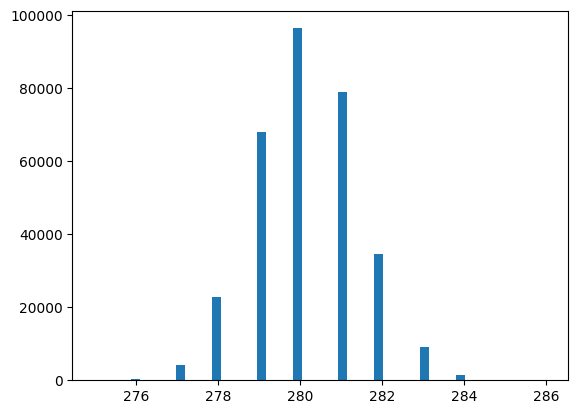

In [3]:
# plot histogram of steps
plt.hist(results['steps'], bins=50);


In [ ]:
results_all = au.load_folder_jsons_to_polars("../simulation_files")

print(results_all.shape)
print(results_all.head())

(1897056, 8)
shape: (5, 8)
┌────────────┬───────────────┬───────┬───────────┬─────┬───────────────┬───────────────┬───────────┐
│ patient_id ┆ audiogram_dat ┆ steps ┆ frequency ┆ ear ┆ final_thresho ┆ threshold_err ┆ threshold │
│ ---        ┆ e             ┆ ---   ┆ ---       ┆ --- ┆ ld            ┆ or            ┆ ---       │
│ str        ┆ ---           ┆ i64   ┆ i64       ┆ str ┆ ---           ┆ ---           ┆ i32       │
│            ┆ str           ┆       ┆           ┆     ┆ i64           ┆ i64           ┆           │
╞════════════╪═══════════════╪═══════╪═══════════╪═════╪═══════════════╪═══════════════╪═══════════╡
│ 00001      ┆ 2019-01-18    ┆ 1188  ┆ 250       ┆ L   ┆ 65            ┆ 0             ┆ 1         │
│ 00001      ┆ 2019-01-18    ┆ 1188  ┆ 250       ┆ R   ┆ 60            ┆ 0             ┆ 1         │
│ 00001      ┆ 2019-01-18    ┆ 1188  ┆ 500       ┆ L   ┆ 60            ┆ 0             ┆ 1         │
│ 00001      ┆ 2019-01-18    ┆ 1188  ┆ 500       ┆ R   ┆ 60     

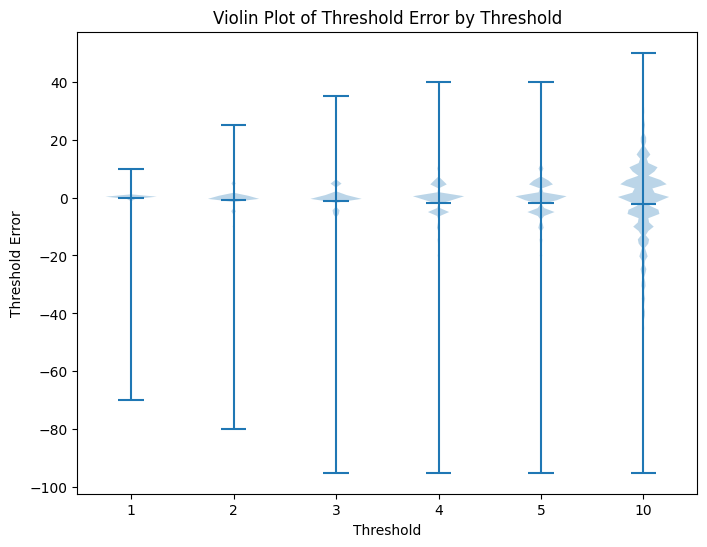

In [ ]:

# plot violin plot of threshold error 
au.plot_violin_threshold_error(results_all)

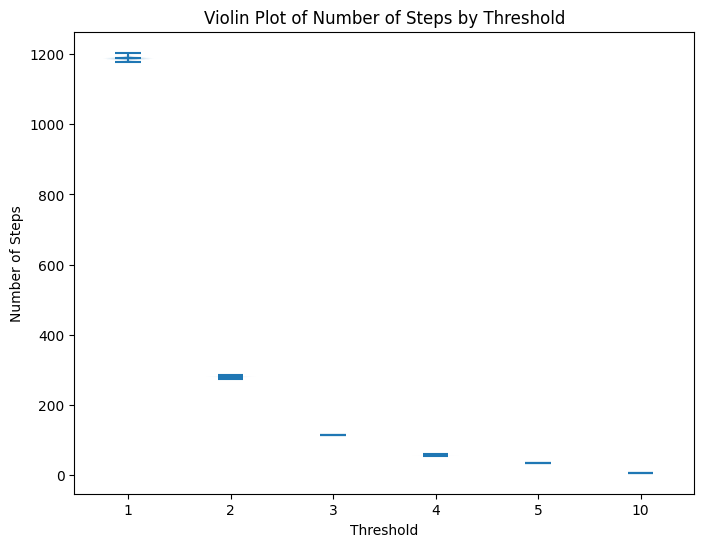

In [6]:


    
au.plot_violin_setps_threshold(results_all)

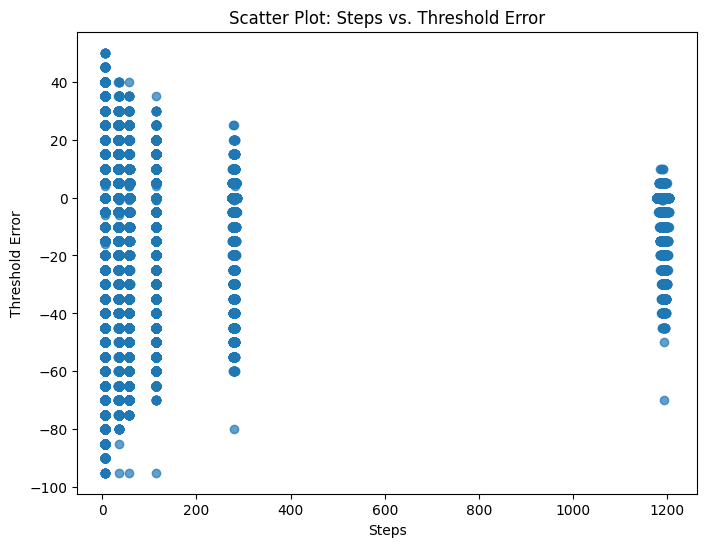

In [7]:


au.plot_steps_vs_threshold_error(results_all)

In [85]:
df = (
    results_all
    .sort("threshold_error")
    #.filter(pl.col("threshold") <= 1)
)

i = 0

In [82]:
# display rows from i to i+5
print(df.slice(i, 5))
i += 5

shape: (5, 8)
┌────────────┬───────────────┬───────┬───────────┬─────┬───────────────┬───────────────┬───────────┐
│ patient_id ┆ audiogram_dat ┆ steps ┆ frequency ┆ ear ┆ final_thresho ┆ threshold_err ┆ threshold │
│ ---        ┆ e             ┆ ---   ┆ ---       ┆ --- ┆ ld            ┆ or            ┆ ---       │
│ str        ┆ ---           ┆ i64   ┆ i64       ┆ str ┆ ---           ┆ ---           ┆ i32       │
│            ┆ str           ┆       ┆           ┆     ┆ i64           ┆ i64           ┆           │
╞════════════╪═══════════════╪═══════╪═══════════╪═════╪═══════════════╪═══════════════╪═══════════╡
│ 02274      ┆ 2019-04-12    ┆ 1189  ┆ 250       ┆ L   ┆ 65            ┆ -45           ┆ 1         │
│ 02274      ┆ 2019-04-12    ┆ 1189  ┆ 500       ┆ L   ┆ 75            ┆ -45           ┆ 1         │
│ 13529      ┆ 2020-11-12    ┆ 1194  ┆ 250       ┆ R   ┆ 70            ┆ -45           ┆ 1         │
│ 14507      ┆ 2022-04-14    ┆ 1193  ┆ 1000      ┆ R   ┆ 75            ┆ -45 

In [87]:
# mean squared error of threshold_error by threshold
mse_by_threshold = (
    df
    .group_by("threshold")
    .agg(
        (pl.col("threshold_error") ** 2).mean().alias("mse_threshold_error")
    ).sort("threshold")
)

mse_by_threshold

threshold,mse_threshold_error
i32,f64
1,7.156388
2,23.935144
3,49.111153
4,77.604983
5,107.507015
10,248.125436


In [9]:
audiograms = (
    pl.read_parquet("../data/anonymized_cleaned_data.parquet")
)

audiograms.head()

Audiogram_Date,Value,Region,Frequency,Ear,pt_ID
date,i32,str,i32,str,str
2019-01-18,65,"""AUL""",250,"""L""","""00001"""
2019-01-18,60,"""AUL""",500,"""L""","""00001"""
2019-01-18,65,"""AUL""",1000,"""L""","""00001"""
2019-01-18,55,"""AUL""",2000,"""L""","""00001"""
2019-01-18,65,"""AUL""",4000,"""L""","""00001"""


In [36]:
df_pt = (
    audiograms
    .filter(pl.col("pt_ID") == "01664")
    .filter(pl.col("Audiogram_Date") == datetime(2017, 2, 20))
)

df_pt

Audiogram_Date,Value,Region,Frequency,Ear,pt_ID
date,i32,str,i32,str,str
2017-02-20,110,"""AMR""",250,"""R""","""01664"""
2017-02-20,120,"""AMR""",500,"""R""","""01664"""
2017-02-20,120,"""AMR""",1000,"""R""","""01664"""
2017-02-20,120,"""AMR""",2000,"""R""","""01664"""
2017-02-20,120,"""AMR""",4000,"""R""","""01664"""
…,…,…,…,…,…
2017-02-20,10,"""BUL""",250,"""L""","""01664"""
2017-02-20,10,"""BUL""",500,"""L""","""01664"""
2017-02-20,10,"""BUL""",1000,"""L""","""01664"""


2017-02-20
(24, 6)
[250, 250, 500, 500, 1000, 1000, 1500, 2000, 2000, 3000, 4000, 4000, 6000, 8000]
[10, 10, 5, 10, 5, 10, 20, 30, 25, 35, 45, 20, 50, 40]
[250, 250, 500, 500, 1000, 1000, 2000, 2000, 4000, 8000]
[110, 50, 120, 65, 120, 70, 120, 70, 120, 105]


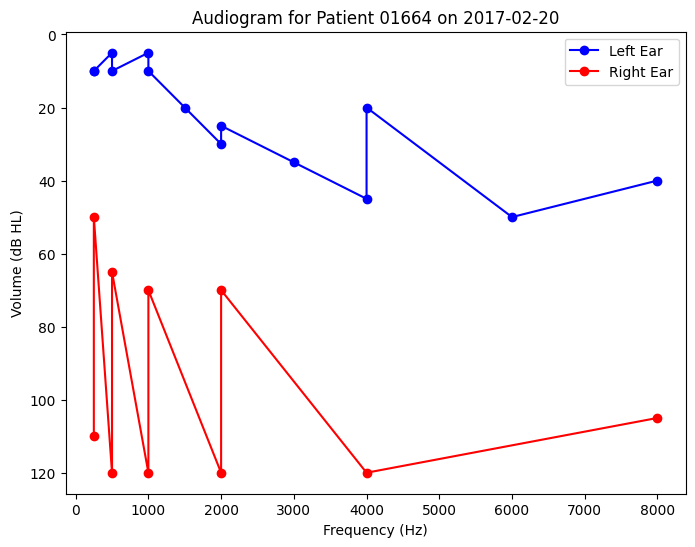

In [ ]:
au.plot_audiogram_polars(audiograms, "01664", "2017-02-20")

In [ ]:

alphas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
stop_thresholds = (10, 5, 4, 3, 2)

def run_sim(alpha, stop_threshold):
    # Create and run the AutomatedSimulation
    automated_sim = AutomatedSimulation(
        model_class=BayesianAdaptiveModel,
        stop_threshold=stop_threshold,
        alpha=alpha
    )
    automated_sim.run_model()

# Create all (alpha, threshold) pairs
param_grid = [(alpha, st_thr) for alpha in alphas for st_thr in stop_thresholds]

# Parallelize
Parallel(n_jobs=-1)(  # use all cores
    delayed(run_sim)(alpha, st_thr) for (alpha, st_thr) in param_grid
)

Filtered data shape: (37640, 14)
Data shape: (26348, 14)
Running simulation for patient ID: 00001, Date: 2019-01-18, Number: 0/26348
Threshold Error: {'250_L': -35, '250_R': -30, '500_L': -25, '500_R': -25, '1000_L': -25, '1000_R': -20, '2000_L': -5, '2000_R': 0, '4000_L': -10, '4000_R': -5, '8000_L': 0, '8000_R': 5}
Running simulation for patient ID: 00084, Date: 2021-12-30, Number: 100/26348
Threshold Error: {'250_L': -5, '250_R': -5, '500_L': 0, '500_R': -5, '1000_L': 0, '1000_R': 0, '2000_L': 5, '2000_R': 20, '4000_L': -15, '4000_R': 0, '8000_L': -20, '8000_R': -5}


KeyboardInterrupt: 

In [55]:
# threshold_error[key] = final_mean - true_threshold

res_all_alpha = au.load_folder_jsons_to_polars("../simulation_files/20250128")


res_all_alpha = (
    res_all_alpha
    .with_columns(
        (pl.col("final_threshold") - pl.col("threshold_error")).alias("true_threshold")
    ).filter(
        pl.col("patient_id") != "012345678"
    )
)

print(res_all_alpha.shape)
print(res_all_alpha.head())


(9485280, 10)
shape: (5, 10)
┌────────────┬─────────────┬───────┬───────────┬───┬─────────────┬────────────┬───────┬────────────┐
│ patient_id ┆ audiogram_d ┆ steps ┆ frequency ┆ … ┆ threshold_e ┆ stop_thres ┆ alpha ┆ true_thres │
│ ---        ┆ ate         ┆ ---   ┆ ---       ┆   ┆ rror        ┆ hold       ┆ ---   ┆ hold       │
│ str        ┆ ---         ┆ i64   ┆ i64       ┆   ┆ ---         ┆ ---        ┆ f64   ┆ ---        │
│            ┆ str         ┆       ┆           ┆   ┆ i64         ┆ i32        ┆       ┆ i64        │
╞════════════╪═════════════╪═══════╪═══════════╪═══╪═════════════╪════════════╪═══════╪════════════╡
│ 00001      ┆ 2019-01-18  ┆ 283   ┆ 250       ┆ … ┆ -5          ┆ 2          ┆ 0.2   ┆ 65         │
│ 00001      ┆ 2019-01-18  ┆ 283   ┆ 250       ┆ … ┆ 0           ┆ 2          ┆ 0.2   ┆ 60         │
│ 00001      ┆ 2019-01-18  ┆ 283   ┆ 500       ┆ … ┆ 0           ┆ 2          ┆ 0.2   ┆ 60         │
│ 00001      ┆ 2019-01-18  ┆ 283   ┆ 500       ┆ … ┆ 0        

In [56]:
for column in res_all_alpha.columns:
    print(column)

patient_id
audiogram_date
steps
frequency
ear
final_threshold
threshold_error
stop_threshold
alpha
true_threshold


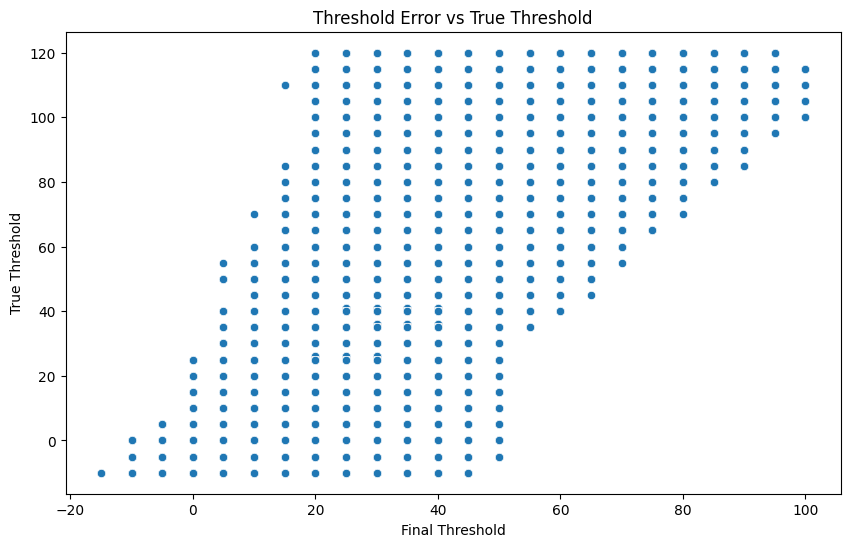

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_all_alpha,
    x="final_threshold",
    y="true_threshold",
)

# Add labels and title
plt.xlabel('Final Threshold')
plt.ylabel('True Threshold')
plt.title('Threshold Error vs True Threshold')

# Show the plot
plt.show()

/var/folders/z0/_c0_fln57vdcshdx5slhzbzc0000gn/T/ipykernel_86767/2919032261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


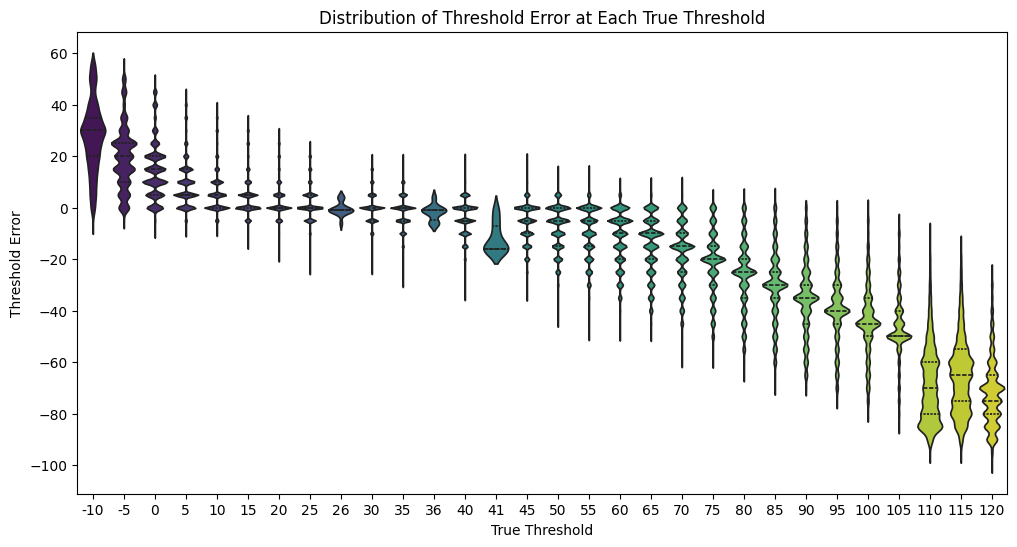

In [59]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=res_all_alpha,
    x='true_threshold',
    y='threshold_error',
    inner='quartile',
    palette='viridis'
)

# Add labels and title
plt.xlabel('True Threshold')
plt.ylabel('Threshold Error')
plt.title('Distribution of Threshold Error at Each True Threshold')

# Show the plot
plt.show()

/Users/jasonbrant/python_projects/adaptive-audiogram/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jasonbrant/python_projects/adaptive-audiogram/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jasonbrant/python_projects/adaptive-audiogram/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jas

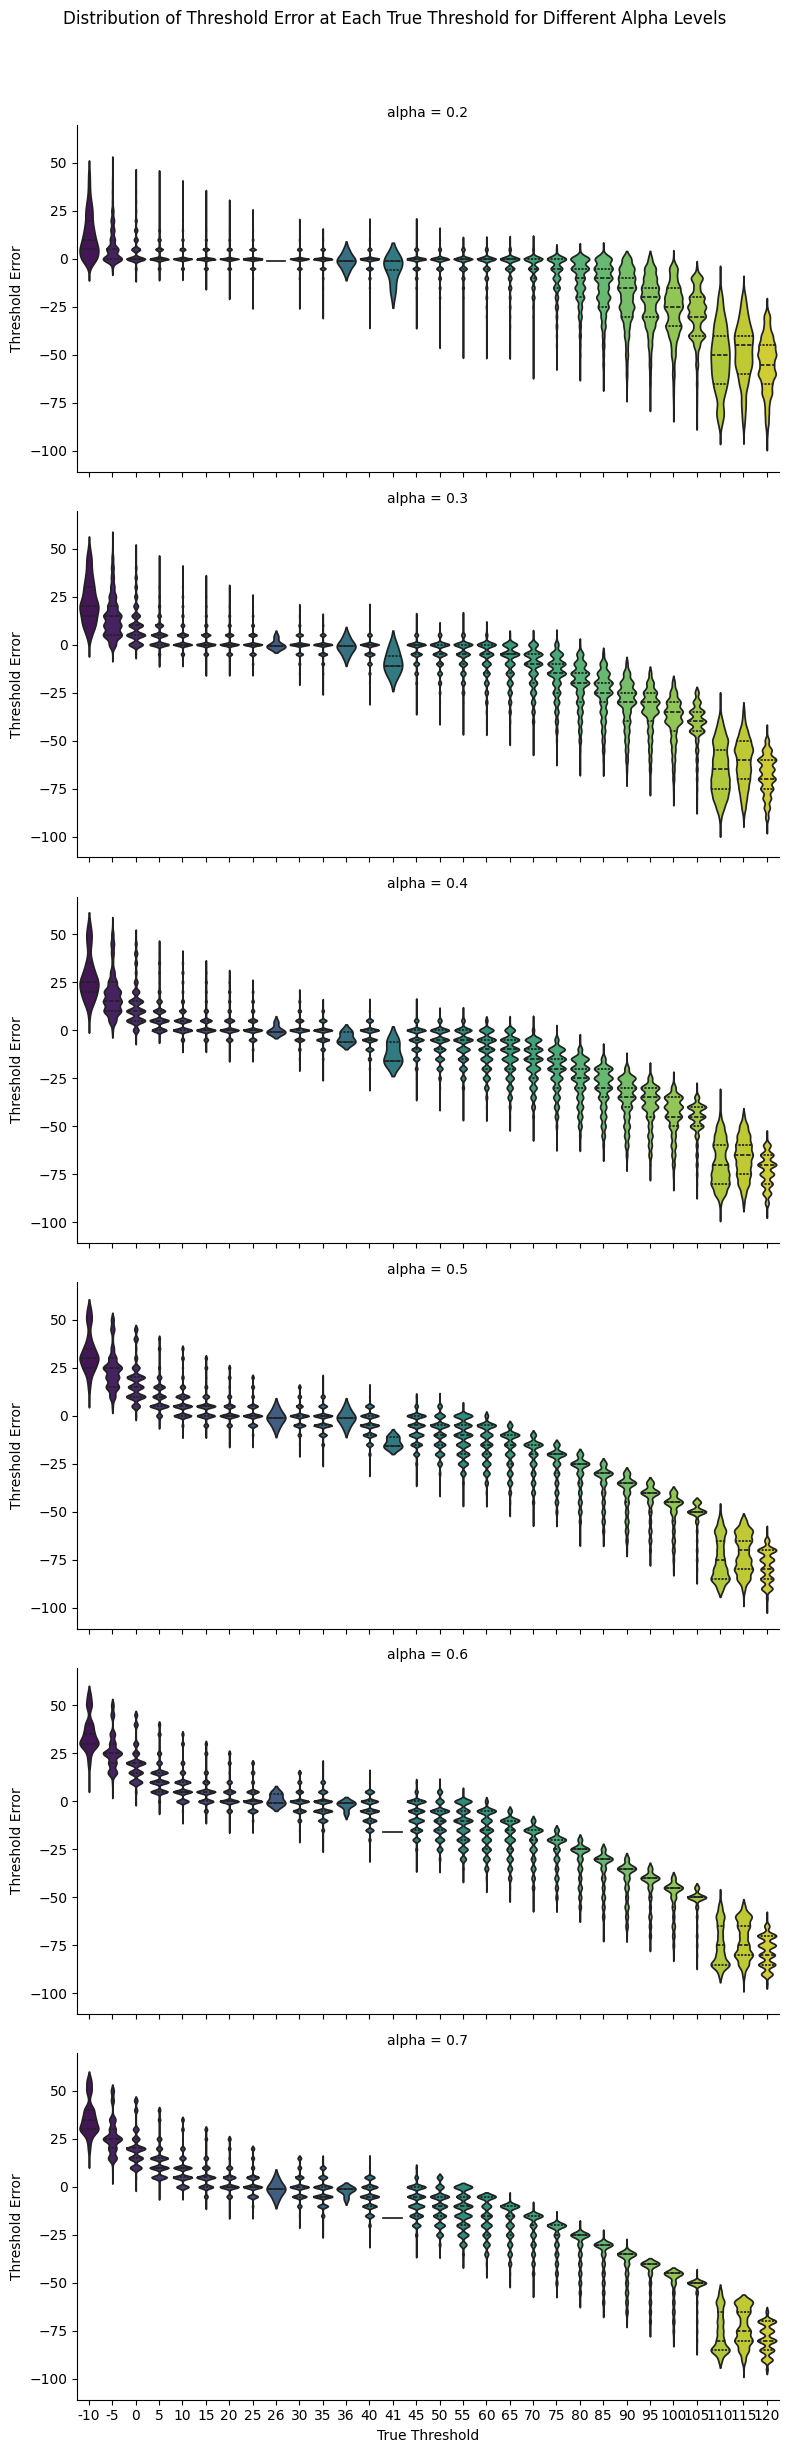

In [60]:
# Create a FacetGrid with alpha levels as rows
g = sns.FacetGrid(
    res_all_alpha,
    row='alpha',
    height=4,
    aspect=2,
    sharex=True,
    sharey=True
)

# Map violin plots to the grid
g.map_dataframe(
    sns.violinplot,
    x='true_threshold',
    y='threshold_error',
    inner='quartile',
    palette='viridis'
)

# Add labels and title
g.set_axis_labels('True Threshold', 'Threshold Error')
g.fig.suptitle('Distribution of Threshold Error at Each True Threshold for Different Alpha Levels', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
(
    res_all_alpha
    .group_by("stop_threshold")
    .agg(
        (pl.col("threshold_error") ** 2).mean().alias("mse_threshold_error")
    ).sort("stop_threshold")
)

stop_threshold,mse_threshold_error
i32,f64
2,187.214765
3,230.904985
4,251.922997
5,270.13324
10,347.228502


In [24]:
mse_alpha = (
    res_all_alpha
    .group_by(["alpha", "stop_threshold"])
    .agg(
        pl.col("steps").mean().alias("mean_steps"),
        (pl.col("threshold_error") ** 2).mean().alias("mse_threshold_error")
    )
).sort(["stop_threshold","alpha",])

mse_alpha.head()

alpha,stop_threshold,mean_steps,mse_threshold_error
f64,i32,f64,f64
0.2,2,280.154319,23.937785
0.3,2,131.546417,87.719776
0.4,2,79.583156,159.37784
0.5,2,56.314066,236.989092
0.6,2,41.549188,284.946226


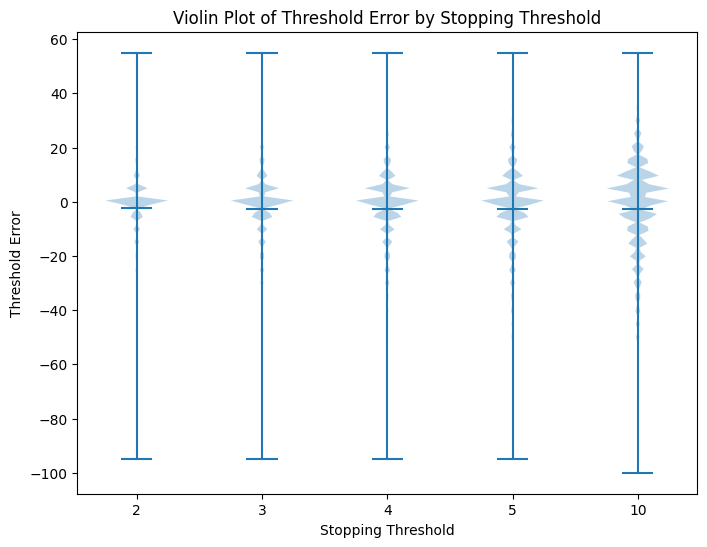

In [4]:
# plot violin plot of threshold error 
au.plot_violin_threshold_error(res_all_alpha)

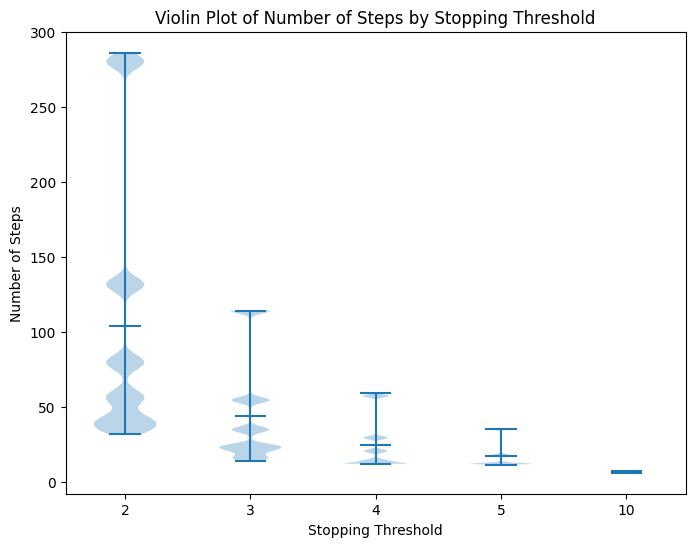

In [6]:
au.plot_violin_setps_threshold(res_all_alpha)

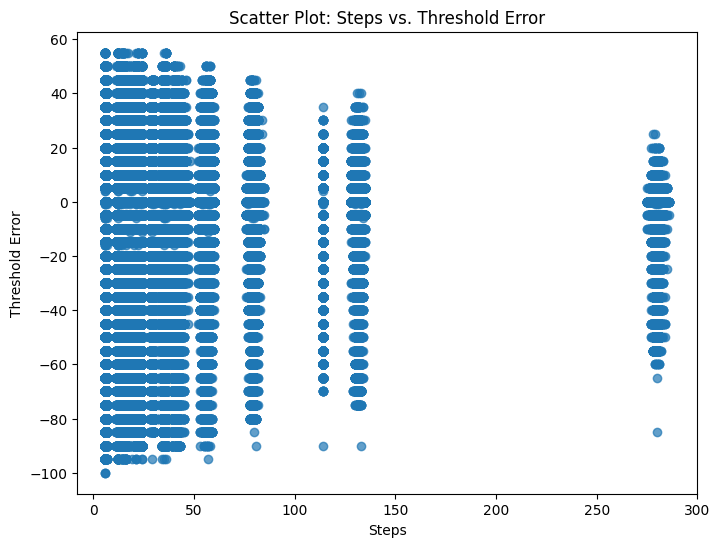

In [7]:
au.plot_steps_vs_threshold_error(res_all_alpha)

In [ ]:
from joblib import Parallel, delayed

# Define your parameter ranges
alphas = [0.2, 0.3, 0.4, 0.5]
stop_thresholds = [10, 5, 3, 2]  
update_factors = [0.5, 1, 2, 5, 10]

def run_sim(alpha, stop_threshold, update_factor):
    """
    Run a single simulation with the given parameters.
    """
    # Create and run the AutomatedSimulation, passing in the parameters.
    # Ensure that AutomatedSimulation passes these parameters to your model (BayesianAdaptiveModel).
    automated_sim = AutomatedSimulation(
        model_class=BayesianAdaptiveModel,
        stop_threshold=stop_threshold,
        alpha=alpha,
        update_factor=update_factor  # New parameter for more aggressive or conservative updates
    )
    automated_sim.run_model()
    # Optionally, you might want to return or save some results here

# Create all combinations of (alpha, stop_threshold, update_factor)
param_grid = [
    (alpha, st_thr, uf)
    for alpha in alphas
    for st_thr in stop_thresholds
    for uf in update_factors
]

# Execute the simulations in parallel, using all available cores
Parallel(n_jobs=-1)(
    delayed(run_sim)(alpha, st_thr, uf) for (alpha, st_thr, uf) in param_grid
)